In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'14Eyl53GurbqECDE93Ur_X73bNzfvTvy_'}) # replace the id with id of file you want to access
downloaded.GetContentFile('telecom_users.csv')

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [6]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
df.tail()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


In [8]:
df.shape

(5986, 22)

In [9]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [11]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df['InternetService'].value_counts()

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64

In [13]:
df['DeviceProtection'].value_counts()

No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64

In [14]:
df['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [15]:
df['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

In [16]:
new_df = df.drop(['Unnamed: 0', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis="columns")
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),No
1,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
2,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes
3,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,No
4,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,No


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in new_df.columns[0:] :
    new_df[i] = le.fit_transform(new_df[i])
        
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,1,1,2,2,1,1,1,1,1,1,2,0,1,0
1,0,0,0,0,1,0,1,0,2,2,0,2,0,0,1,1,0
2,0,1,1,0,1,2,1,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,2,0
4,1,0,0,0,1,0,0,2,0,2,0,0,0,0,0,2,0


In [18]:
new_df.tail()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
5981,1,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,1
5982,0,0,1,1,1,2,0,2,2,2,2,2,2,2,1,1,0
5983,1,0,1,1,1,0,2,1,1,1,1,1,1,0,1,2,0
5984,1,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1
5985,1,0,0,0,1,0,2,1,1,1,1,1,1,1,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


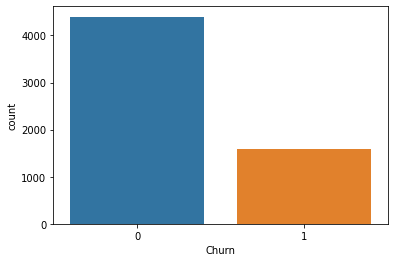

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot('Churn', data=new_df)

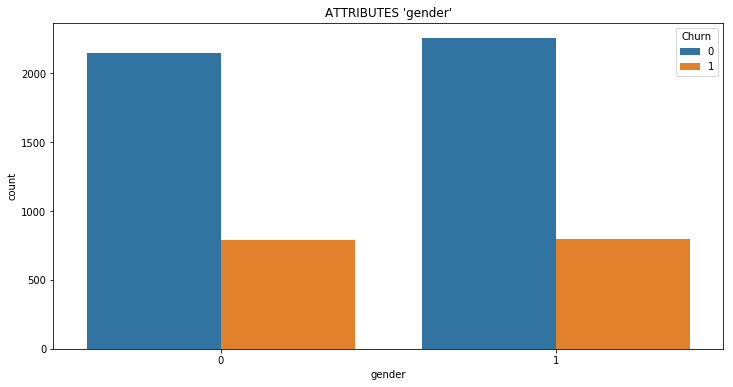

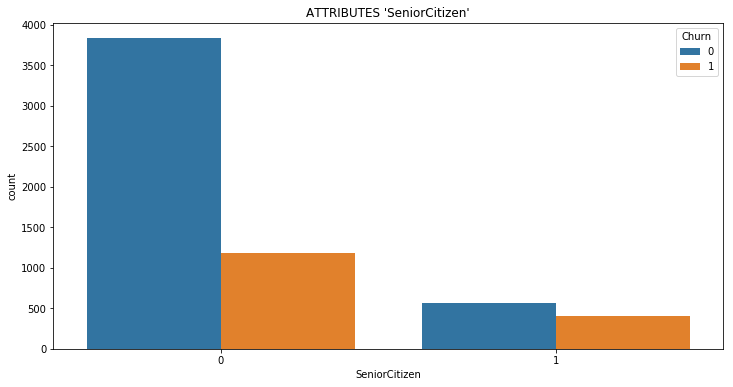

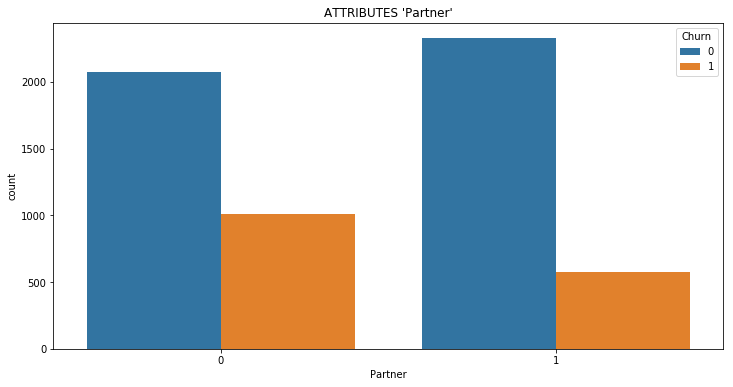

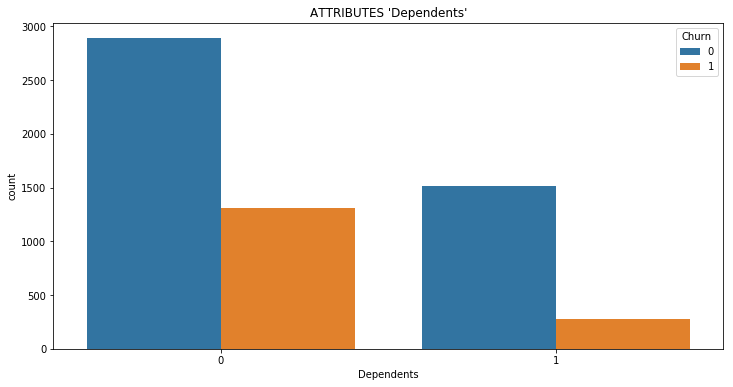

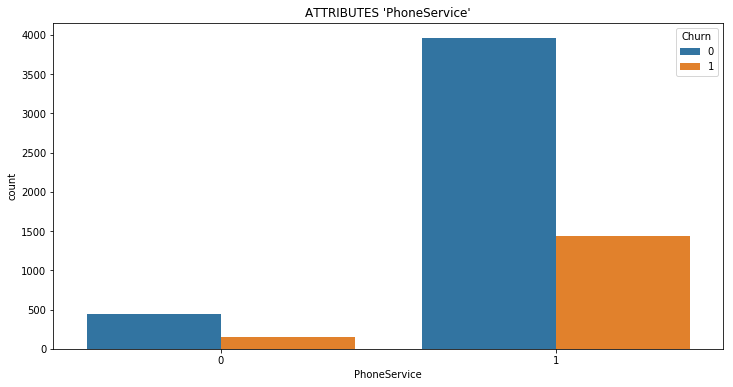

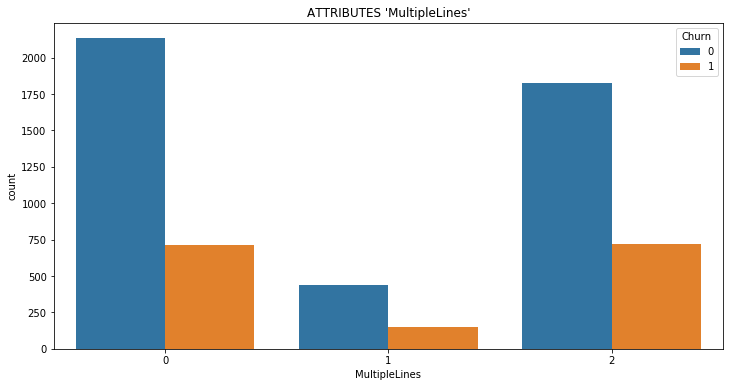

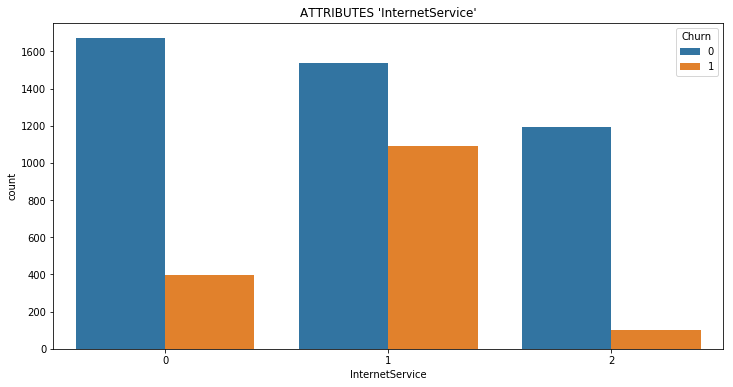

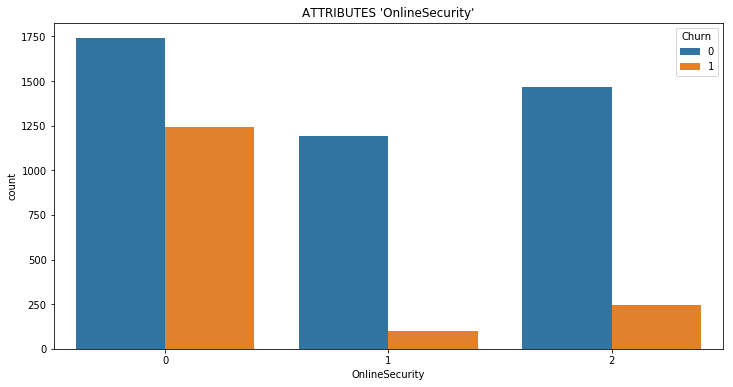

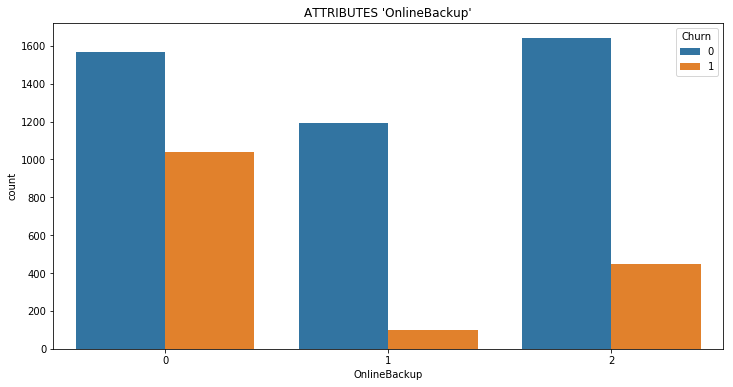

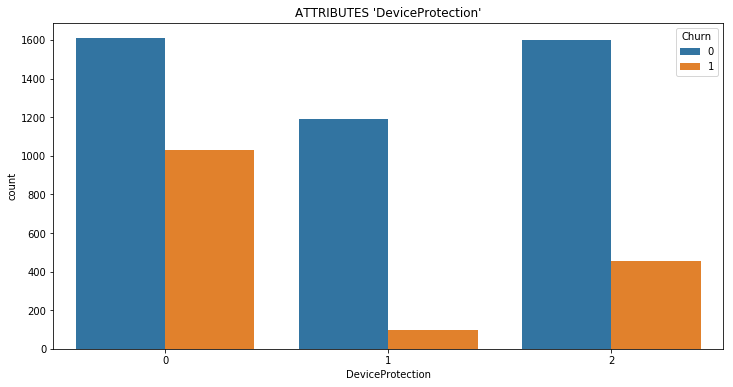

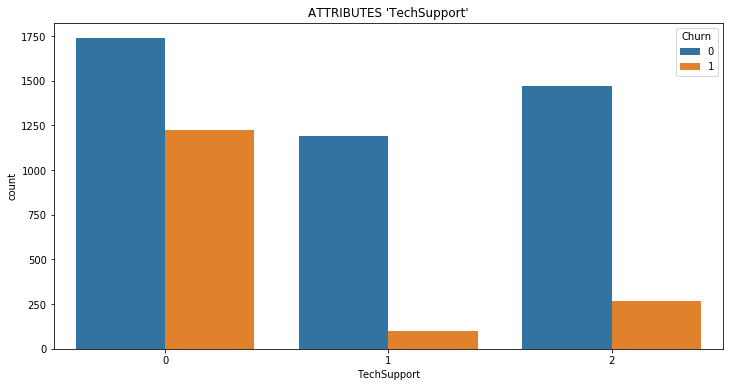

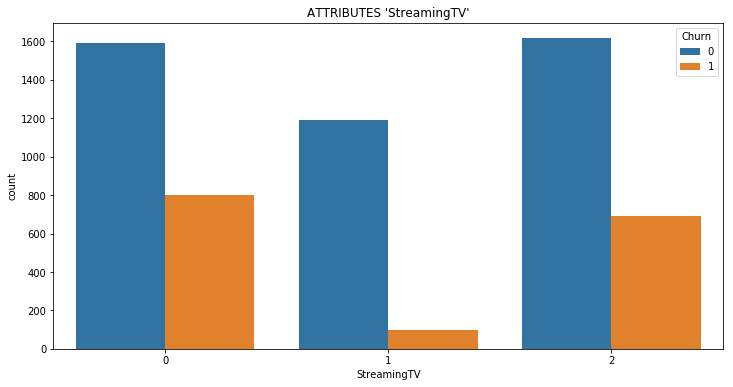

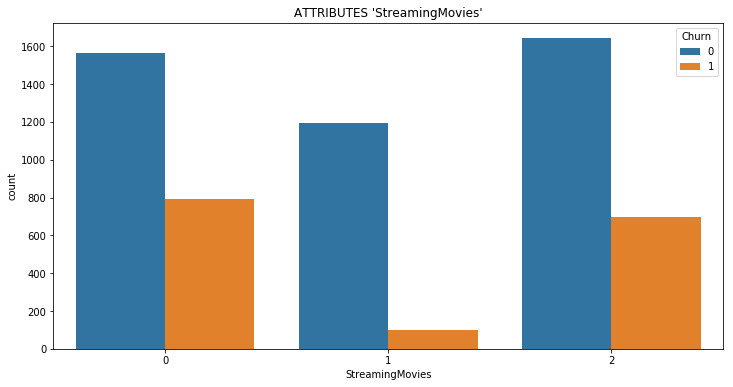

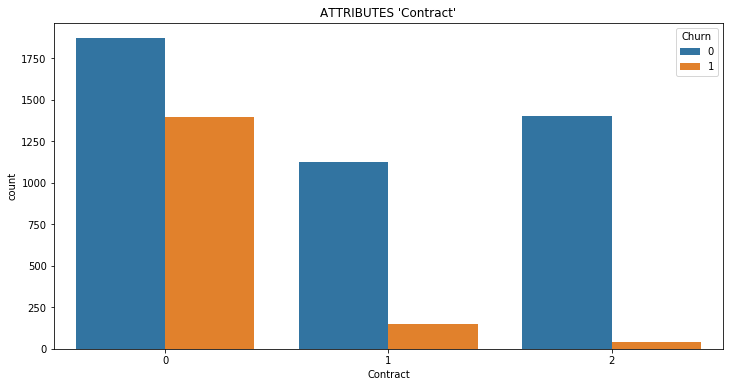

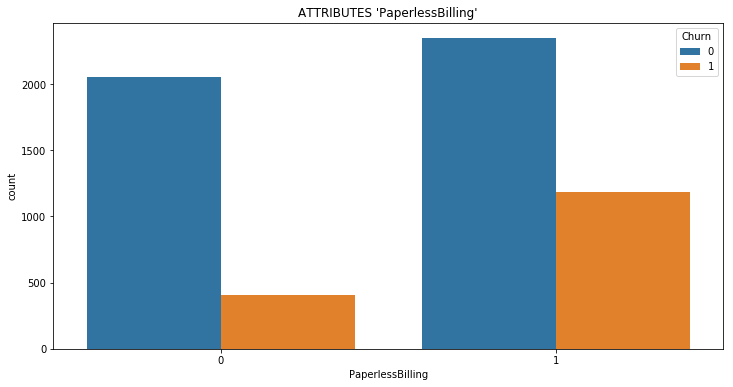

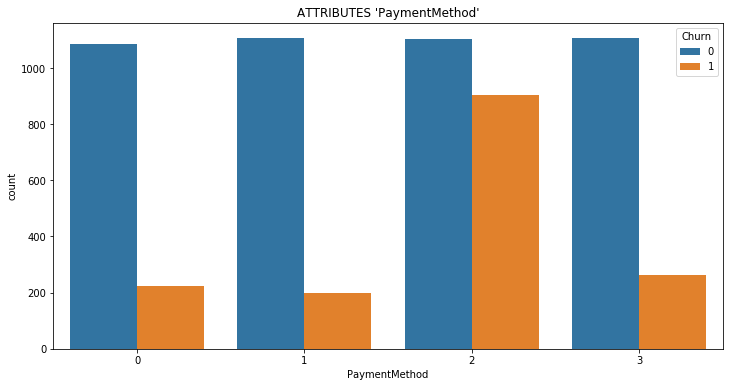

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for i in new_df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.countplot(new_df[i],hue=new_df['Churn'])

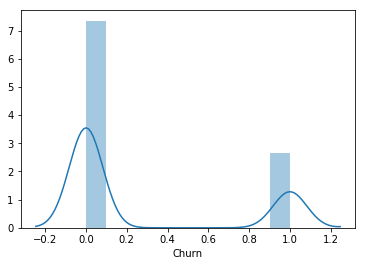

In [ ]:
sns.distplot(new_df['Churn'])

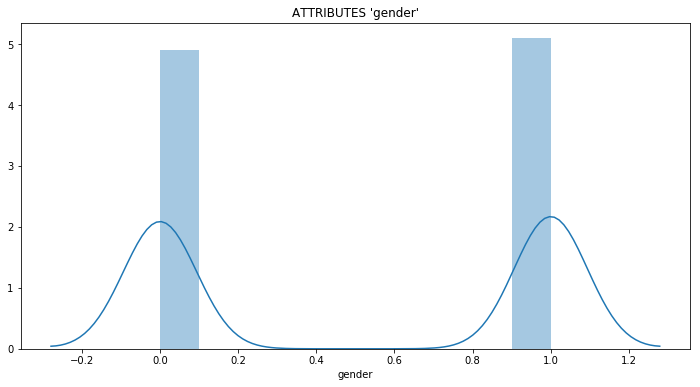

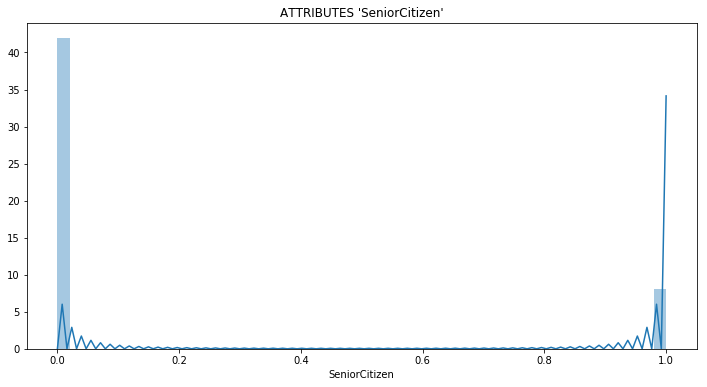

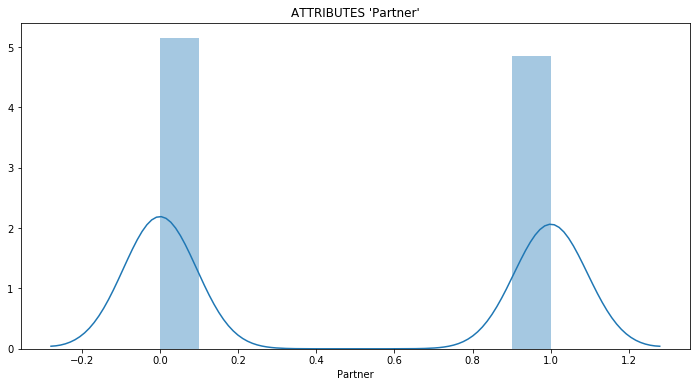

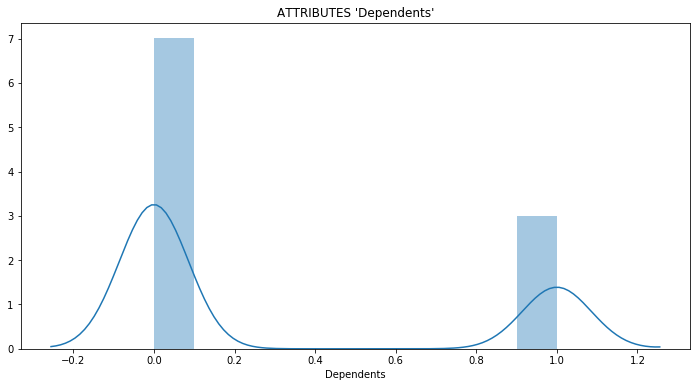

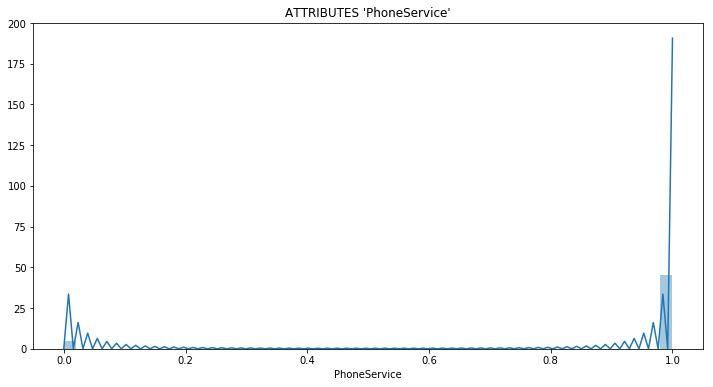

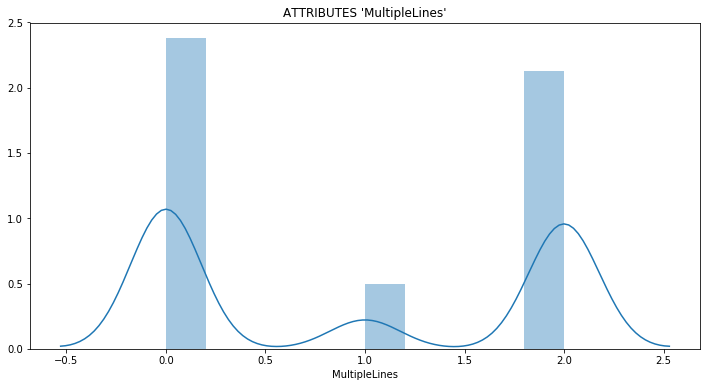

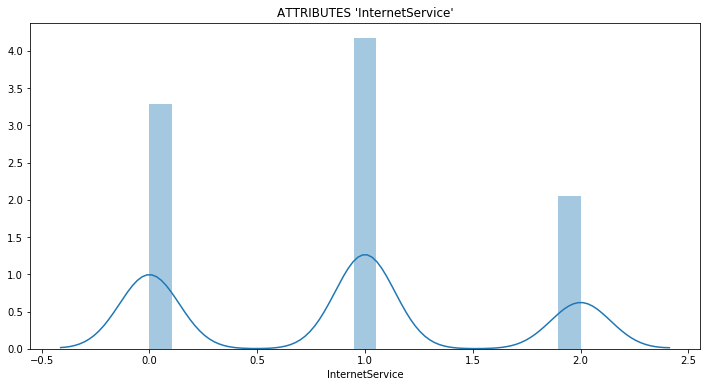

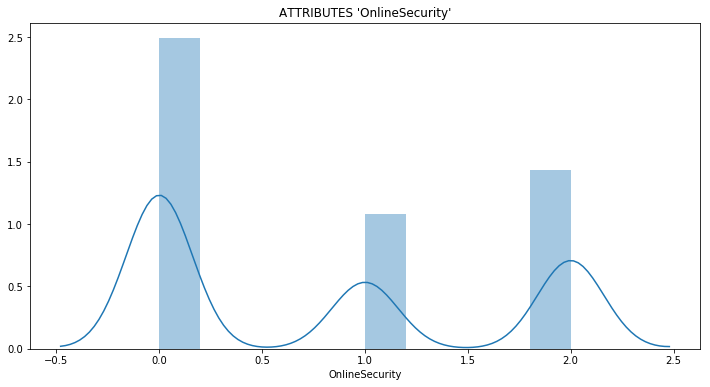

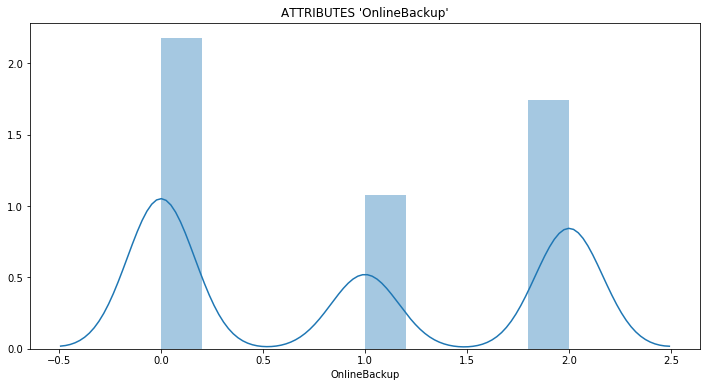

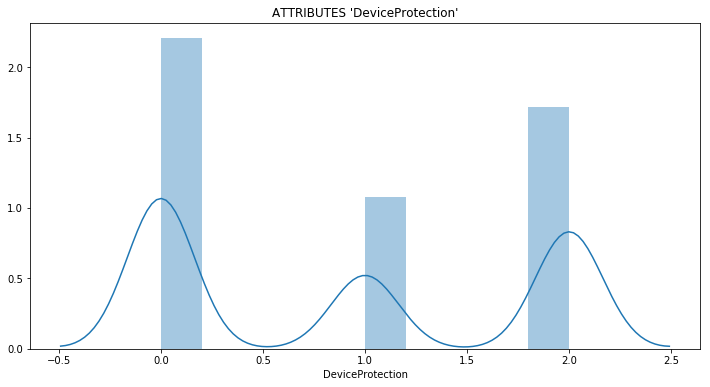

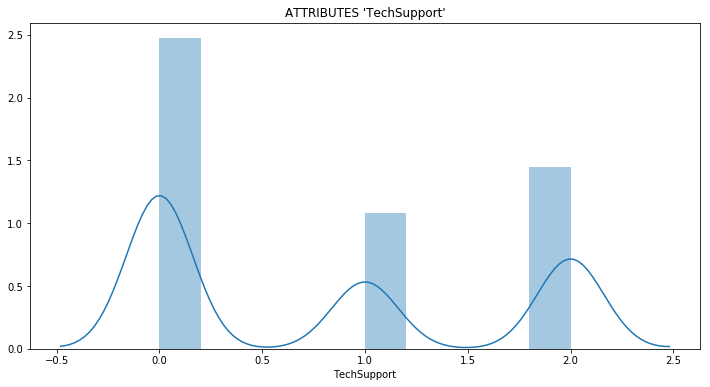

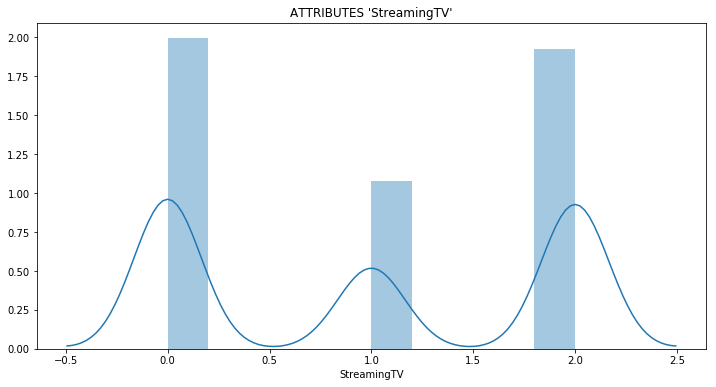

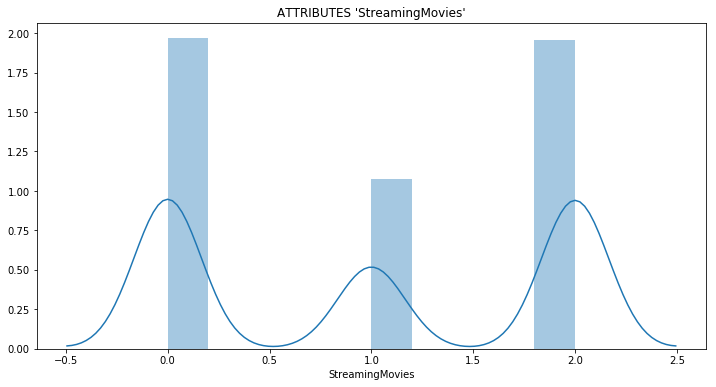

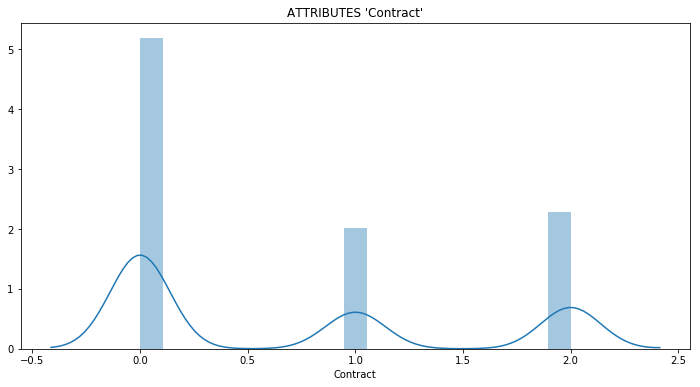

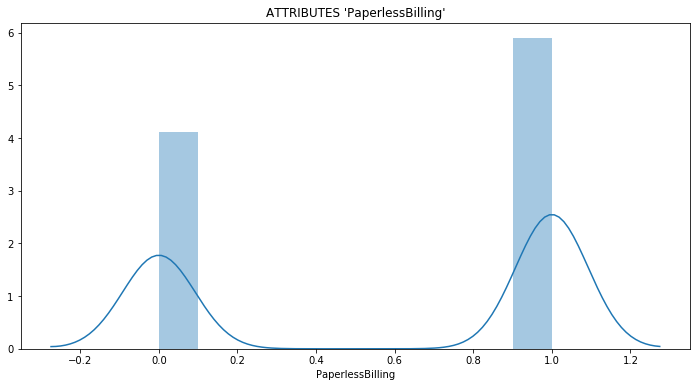

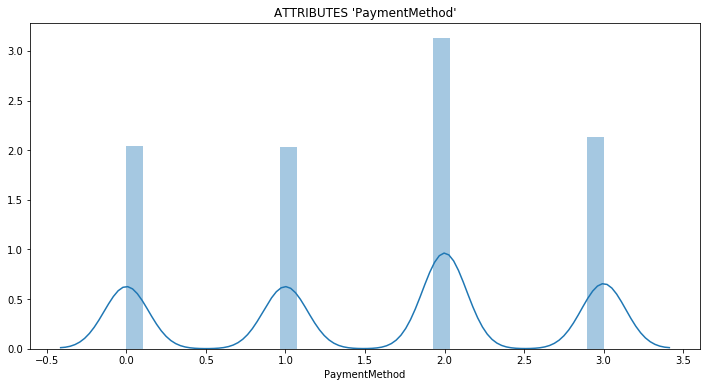

In [ ]:
for i in new_df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.distplot(new_df[i])

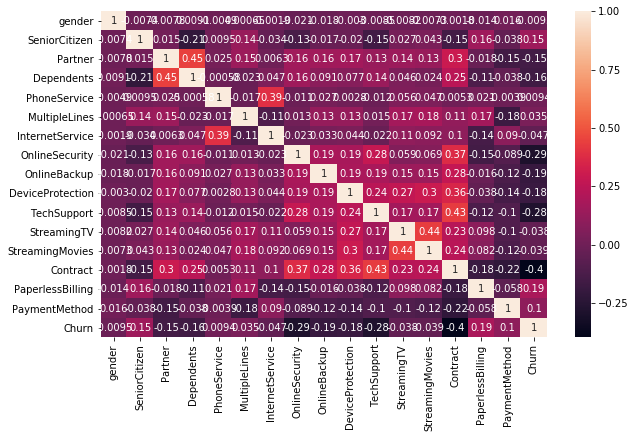

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(), annot=True)

In [19]:
X = new_df.drop(['Churn'], axis="columns")
X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,0,1,1,1,2,2,1,1,1,1,1,1,2,0,1
1,0,0,0,0,1,0,1,0,2,2,0,2,0,0,1,1
2,0,1,1,0,1,2,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,2
4,1,0,0,0,1,0,0,2,0,2,0,0,0,0,0,2


In [20]:
y = new_df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [23]:
nb.score(X_test, y_test)

0.7395659432387313

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10, random_state=42)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [25]:
dtc.score(X_test, y_test)

0.7353923205342237

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=70, random_state=101)

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=101)

In [34]:
rfc.score(X_test, y_test)

0.7429048414023373

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=0.25, random_state=101)

svm.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=101)

In [28]:
svm.score(X_test, y_test)

0.7679465776293823

In [29]:
!pip install pycaret

In [30]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [32]:
from pycaret.classification import *

exp_clf = setup(new_df, target = "Churn")

,Description,Value
0,session_id,7209
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5986, 17)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7885,0.8304,0.5227,0.6264,0.5690,0.4306,0.4342,0.392
lr,Logistic Regression,0.7876,0.8330,0.5272,0.6216,0.5696,0.4301,0.4332,0.326
ada,Ada Boost Classifier,0.7862,0.8320,0.5344,0.6163,0.5715,0.4302,0.4327,0.210
lda,Linear Discriminant Analysis,0.7859,0.8297,0.5531,0.6111,0.5795,0.4366,0.4384,0.040
ridge,Ridge Classifier,0.7847,0.0000,0.4826,0.6276,0.5444,0.4069,0.4136,0.024
lightgbm,Light Gradient Boosting Machine,0.7761,0.8100,0.5049,0.5970,0.5460,0.3991,0.4022,0.151
svm,SVM - Linear Kernel,0.7640,0.0000,0.4727,0.5980,0.4921,0.3516,0.3728,0.039
rf,Random Forest Classifier,0.7544,0.7718,0.4550,0.5490,0.4970,0.3367,0.3395,0.692
et,Extra Trees Classifier,0.7496,0.7281,0.4487,0.5378,0.4888,0.3250,0.3276,0.722
knn,K Neighbors Classifier,0.7446,0.7577,0.5013,0.5247,0.5121,0.3394,0.3400,0.198


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7209, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [35]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7589,0.8227,0.4554,0.5604,0.5025,0.3456,0.3489
1,0.7685,0.8107,0.5089,0.5758,0.5403,0.3864,0.3877
2,0.8043,0.8516,0.5446,0.6630,0.5980,0.4703,0.4743
3,0.7566,0.7823,0.4107,0.5610,0.4742,0.3207,0.3273
4,0.8019,0.8429,0.5625,0.6495,0.6029,0.4718,0.4740
5,0.8162,0.8633,0.5714,0.6882,0.6244,0.5041,0.5079
6,0.8162,0.8530,0.5268,0.7108,0.6051,0.4888,0.4981
7,0.7757,0.8244,0.5714,0.5818,0.5766,0.4240,0.4240
8,0.7924,0.8387,0.5357,0.6316,0.5797,0.4431,0.4457
9,0.7947,0.8145,0.5398,0.6421,0.5865,0.4514,0.4544


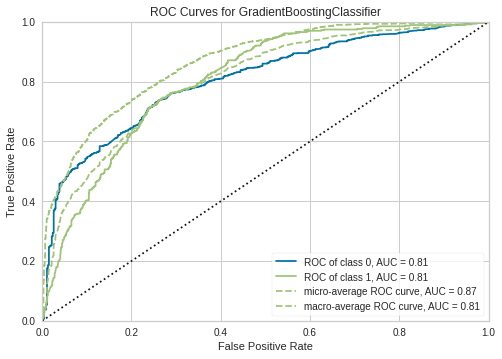

In [39]:
plot_model(gbc)

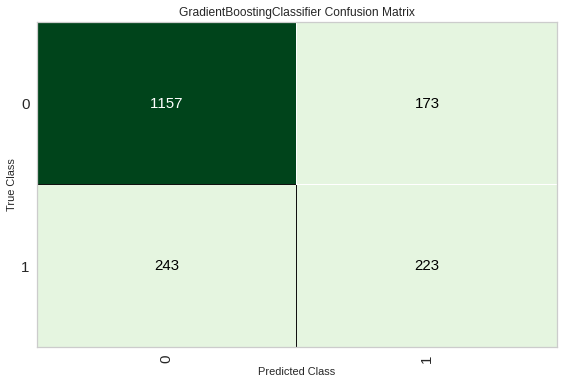

In [41]:
plot_model(gbc, 'confusion_matrix')

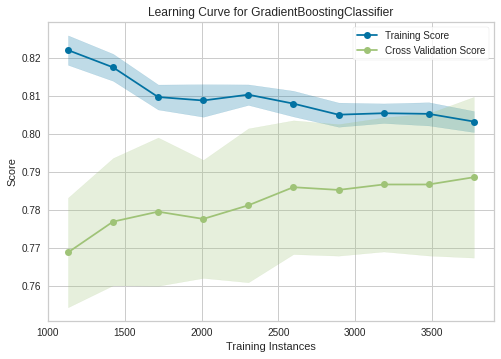

In [42]:
plot_model(gbc, 'learning')

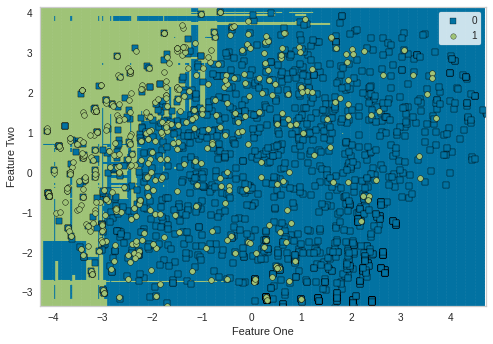

In [43]:
plot_model(gbc, 'boundary')

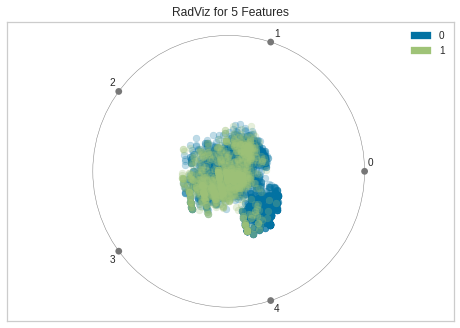

In [44]:
plot_model(gbc, 'dimension')